# **SP23-BAI-046**

# **NOOR FATIMA**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# **Load dataset**

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [4]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

## **# Preprocessing data**

In [5]:
X_train = X_train.reshape(-1, 784).astype('float32') / 255.0
X_test = X_test.reshape(-1, 784).astype('float32') / 255.0

In [6]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [7]:
print(X_train.shape, y_train.shape)
print(X_val.shape,   y_val.shape)

(48000, 784) (48000,)
(12000, 784) (12000,)


# **simple model**

In [8]:
model = Sequential([
    Dense(256, activation='relu', input_shape=(784,)),  # 784 input features
    Dropout(0.05),
    Dense(128, activation='relu'),
    Dropout(0.05),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')  # 10 output classes for digits 0–9
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [10]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=30, batch_size=128, verbose=0)

In [12]:
test_loss, test_acc= model.evaluate(X_test, y_test)
print("Test accuracy: ", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9750 - loss: 0.1331
Test accuracy:  0.9789999723434448


LOSS

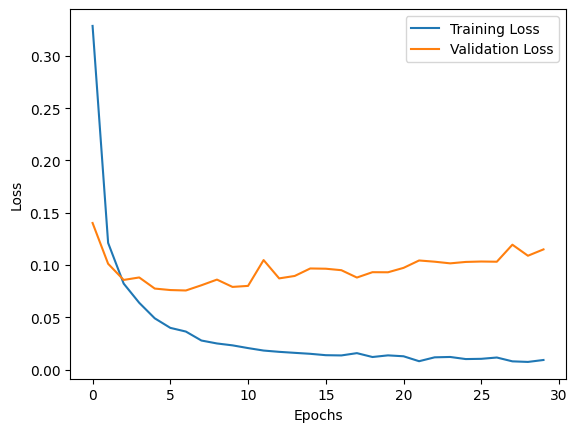

In [13]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Accuracy

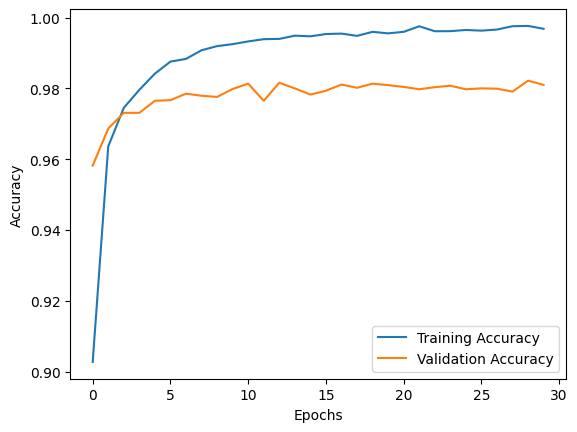

In [14]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [15]:
from tensorflow.keras.regularizers import l1, l2

# **model with L1 regularization**

In [16]:
model_l1 = Sequential([
    Dense(256, activation='relu', input_shape=(784,), kernel_regularizer=l1(0.001)),
    Dense(128, activation='relu', kernel_regularizer=l1(0.001)),
    Dense(64, activation='relu', kernel_regularizer=l1(0.001)),
    Dense(10, activation='softmax')
])

In [17]:
model_l1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [19]:
history1=model_l1.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.9451 - loss: 0.4625 - val_accuracy: 0.9368 - val_loss: 0.4768
Epoch 2/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.9488 - loss: 0.4429 - val_accuracy: 0.9471 - val_loss: 0.4508
Epoch 3/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.9472 - loss: 0.4423 - val_accuracy: 0.9346 - val_loss: 0.4874
Epoch 4/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.9462 - loss: 0.4410 - val_accuracy: 0.9422 - val_loss: 0.4532
Epoch 5/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9465 - loss: 0.4383 - val_accuracy: 0.9510 - val_loss: 0.4257
Epoch 6/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.9473 - loss: 0.4336 - val_accuracy: 0.9498 - val_loss: 0.4257
Epoch 7/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9507 - loss: 0.4231 - val_accuracy: 0.9340 - val_loss: 0.4670
Epoch 8/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.9497 - loss: 0.4201

In [20]:
test_loss1, test_acc1= model.evaluate(X_test, y_test)
print("Test accuracy: ", test_acc1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9750 - loss: 0.1331
Test accuracy:  0.9789999723434448


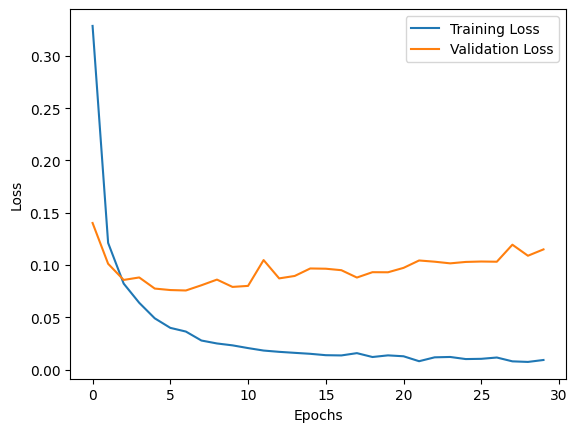

In [21]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

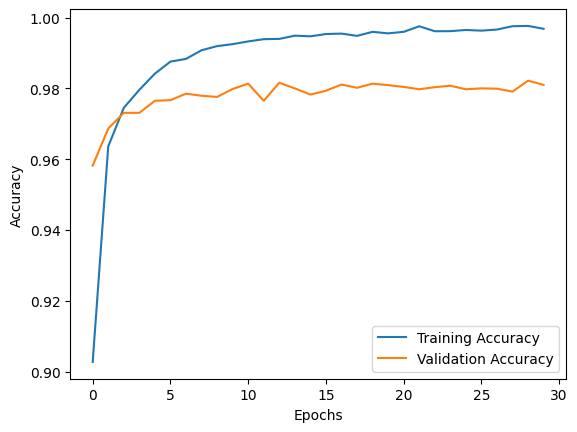

In [22]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# **model with L2 regularization**

In [23]:
model_l2= Sequential(
    [
        Dense(256, activation='relu', kernel_regularizer=l2(0.01),input_shape=(784,)),
        Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
        Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
        Dense(10, activation='softmax')
    ]
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
model_l2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [25]:
history2=model_l2.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.8232 - loss: 2.1041 - val_accuracy: 0.9126 - val_loss: 0.7271
Epoch 2/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9090 - loss: 0.6945 - val_accuracy: 0.9160 - val_loss: 0.6269
Epoch 3/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.9205 - loss: 0.6067 - val_accuracy: 0.9268 - val_loss: 0.5595
Epoch 4/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.9302 - loss: 0.5498 - val_accuracy: 0.9406 - val_loss: 0.5055
Epoch 5/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.9375 - loss: 0.5076 - val_accuracy: 0.9380 - val_loss: 0.5003
Epoch 6/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9373 - loss: 0.4853 - val_accuracy: 0.9262 - val_loss: 0.5090
Epoch 7/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9420 - loss: 0.4584 - val_accuracy: 0.9480 - val_loss: 0.4308
Epoch 8/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.9472 - loss: 0.438

In [26]:
test_loss2, test_acc2= model.evaluate(X_test, y_test)
print("Test accuracy: ", test_acc2)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9750 - loss: 0.1331
Test accuracy:  0.9789999723434448


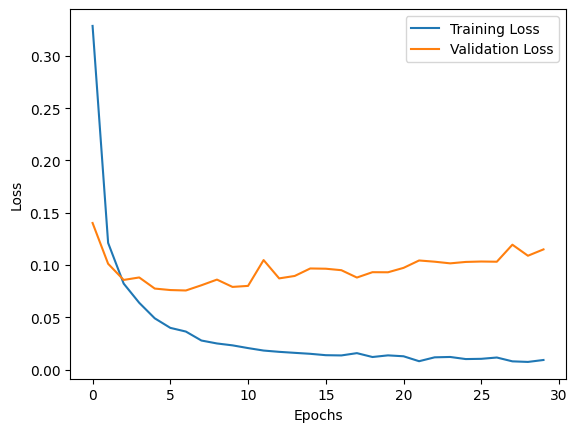

In [27]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

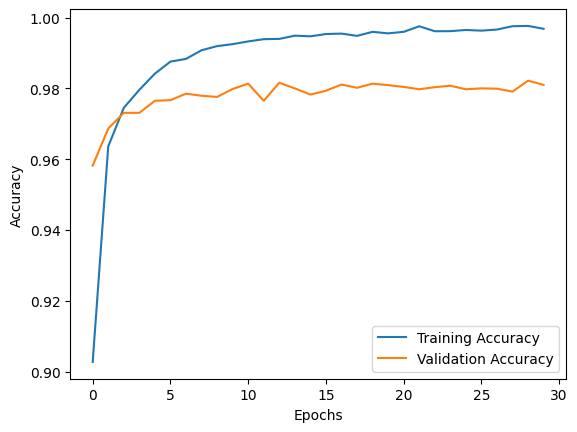

In [29]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# **model with more number of nuerons nd layers**

In [30]:
model_nuerons= Sequential(
    [
        Dense(512, activation='relu',input_shape=(784,)),
        Dropout(0.05),
        Dense(256, activation='relu'),
        Dropout(0.05),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ]
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [31]:
model_nuerons.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [32]:
history3=model_nuerons.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.8748 - loss: 0.4157 - val_accuracy: 0.9519 - val_loss: 0.1660
Epoch 2/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - accuracy: 0.9670 - loss: 0.1078 - val_accuracy: 0.9686 - val_loss: 0.1094
Epoch 3/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 15s 13ms/step - accuracy: 0.9769 - loss: 0.0714 - val_accuracy: 0.9657 - val_loss: 0.1136
Epoch 4/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 16s 14ms/step - accuracy: 0.9820 - loss: 0.0556 - val_accuracy: 0.9717 - val_loss: 0.1071
Epoch 5/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 13s 11ms/step - accuracy: 0.9846 - loss: 0.0486 - val_accuracy: 0.9721 - val_loss: 0.0978
Epoch 6/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9874 - loss: 0.0405 - val_accuracy: 0.9730 - val_loss: 0.1014
Epoch 7/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 14s 12ms/step - accuracy: 0.9887 - loss: 0.0357 - val_accuracy: 0.9727 - val_loss: 0.1020
Epoch 8/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9893 -

In [33]:
test_loss3, test_acc3= model_nuerons.evaluate(X_test, y_test)
print("Test Accuracy: ", test_acc3)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9767 - loss: 0.1055
Test Accuracy:  0.9778000116348267


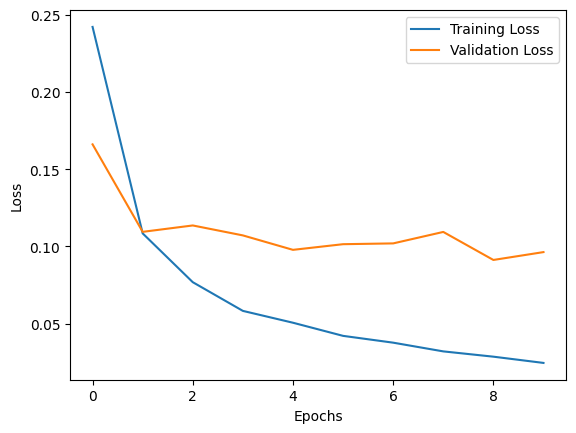

In [34]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

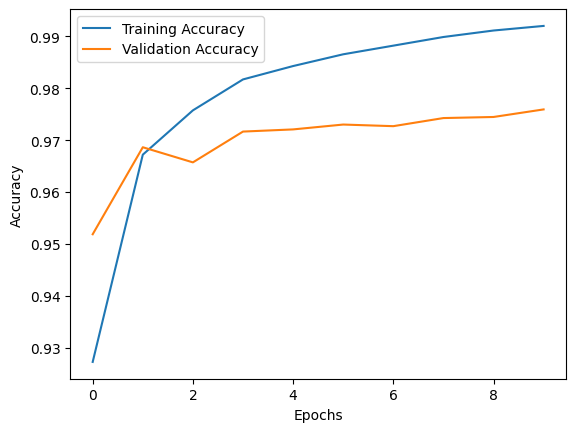

In [35]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()